# 1. Data cleaning

In [1]:
# loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## 1.1 Sales by customer location 

In [2]:
# Read the training datasets
df= pd.read_csv('Sales by customer location train.csv') 

df

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07
...,...,...,...,...,...,...,...,...,...,...,...
1827587,17b4adf18100c8673e3f2c72dff87722,Store,QLD,4220.0,Mainstream-Midage Singles/Couples,8,9,710.79,646.18,319.40,2021-07-18
1827588,b16365302aa017bfadf5b34a84a84e45,Store,WA,6066.0,Mainstream-Retirees,42,46,2064.05,1886.07,268.02,2022-12-18
1827589,d0f1c52a0107bd8707444bbf130a0234,Store,WA,6170.0,Mainstream-Midage Singles/Couples,29,37,1795.17,1634.68,170.20,2022-02-13
1827590,408b7c8ad06e4d9954fa2d948a01f508,Store,NSW,2769.0,Mainstream-Older Singles/Couples,32,38,2141.80,1973.61,204.08,2022-12-18


In [3]:
df.info

<bound method DataFrame.info of                                  store_id sales_channel customer_state  \
0        536fcc1021bff60edb212ca9b2480757         Store            NSW   
1        151e50feaf21b61cf23e0b944abebe28         Store            VIC   
2        b94d71e6bc4cc21ffbaaef5e4aca6f03         Store            QLD   
3        336e7e53cf0e3fbc9eb41bfaf6dc4847         Store             SA   
4        97012ce84c33e28732cb5f12bb92363c         Store            VIC   
...                                   ...           ...            ...   
1827587  17b4adf18100c8673e3f2c72dff87722         Store            QLD   
1827588  b16365302aa017bfadf5b34a84a84e45         Store             WA   
1827589  d0f1c52a0107bd8707444bbf130a0234         Store             WA   
1827590  408b7c8ad06e4d9954fa2d948a01f508         Store            NSW   
1827591  e85984bd537ecc6d027b43bef22e4f12         Store            NSW   

         customer_postcode            price_lifestage_segment  customer_count  

In [4]:
# Find out the missing values
df =df .replace(r'^\s*$',np.nan, regex=True)
df.isnull().sum()

store_id                             0
sales_channel                        0
customer_state                       0
customer_postcode                    7
price_lifestage_segment          13565
customer_count                       0
transaction_count                    0
total_sale_value                     0
total_sale_value_ex_gst              0
total_promotional_sales_value        0
financial_week_end_date              0
dtype: int64

In [5]:
# Fill missing values in customer_postcode with the median
median_value = df['customer_postcode'].median()
df['customer_postcode'].fillna(median_value, inplace=True)

# Fill missing values in price_lifestage_segment with the mode
mode_value = df['price_lifestage_segment'].mode()[0]
df['price_lifestage_segment'].fillna(mode_value, inplace=True)

df

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07
...,...,...,...,...,...,...,...,...,...,...,...
1827587,17b4adf18100c8673e3f2c72dff87722,Store,QLD,4220.0,Mainstream-Midage Singles/Couples,8,9,710.79,646.18,319.40,2021-07-18
1827588,b16365302aa017bfadf5b34a84a84e45,Store,WA,6066.0,Mainstream-Retirees,42,46,2064.05,1886.07,268.02,2022-12-18
1827589,d0f1c52a0107bd8707444bbf130a0234,Store,WA,6170.0,Mainstream-Midage Singles/Couples,29,37,1795.17,1634.68,170.20,2022-02-13
1827590,408b7c8ad06e4d9954fa2d948a01f508,Store,NSW,2769.0,Mainstream-Older Singles/Couples,32,38,2141.80,1973.61,204.08,2022-12-18


In [6]:
# Check out the missing values after filling
df =df .replace(r'^\s*$',np.nan, regex=True)
df.isnull().sum()

store_id                         0
sales_channel                    0
customer_state                   0
customer_postcode                0
price_lifestage_segment          0
customer_count                   0
transaction_count                0
total_sale_value                 0
total_sale_value_ex_gst          0
total_promotional_sales_value    0
financial_week_end_date          0
dtype: int64

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


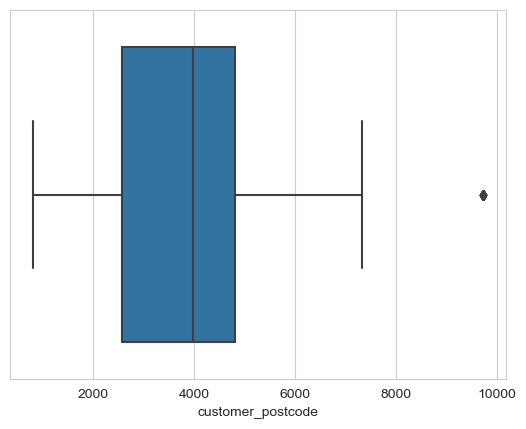

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


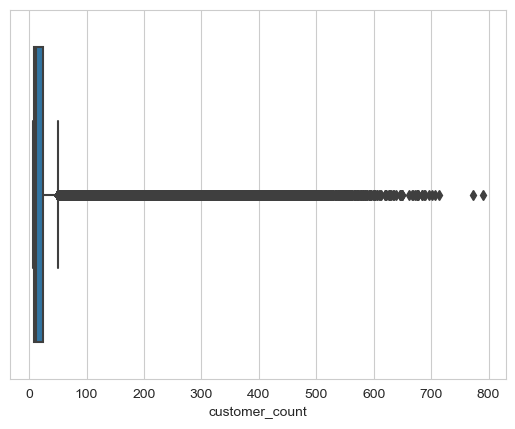

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


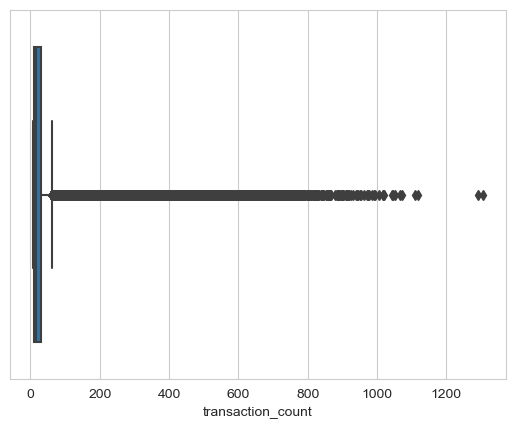

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


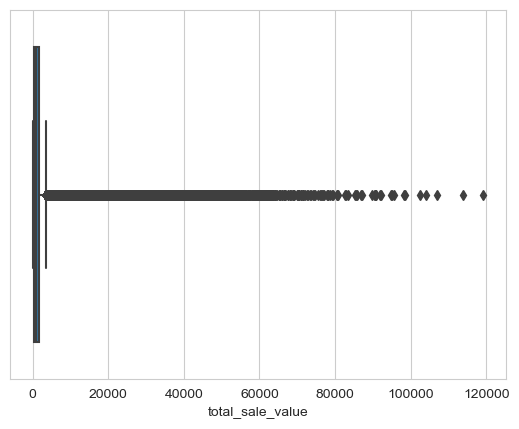

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


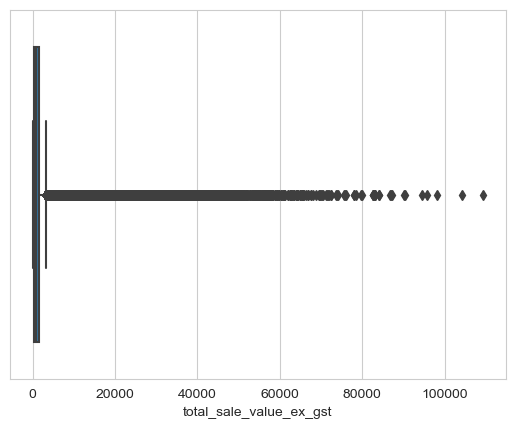

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


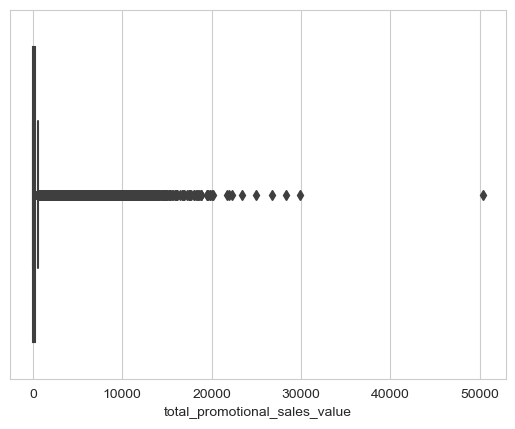

In [7]:
# Mapping outliers in boxplots

for i in df:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [8]:
#cols is a list containing column names to detect outliers
cols = ['customer_postcode', 'customer_count', 'transaction_count', 'total_sale_value', 'total_sale_value_ex_gst', 'total_promotional_sales_value']  # Replace with your actual column names

# Loop through each specified column for outlier detection
for col in cols:
    # Check if the column exists in df and is of numeric type
    if col in df.columns and df[col].dtype != 'object':
        # Calculate the first quartile (Q1)
        Q1 = df[col].quantile(0.25)
        
        # Calculate the third quartile (Q3)
        Q3 = df[col].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Define lower and upper limits for outlier detection
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to keep only values within the specified limits, removing outliers
        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


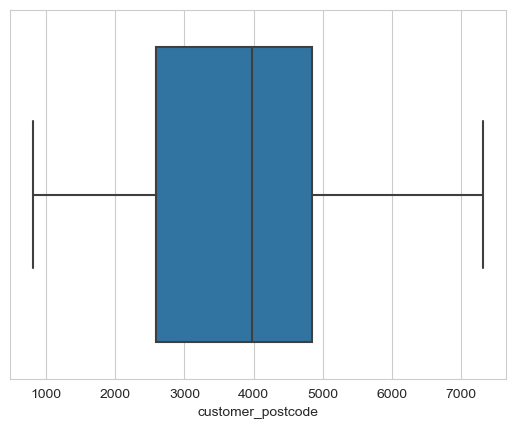

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


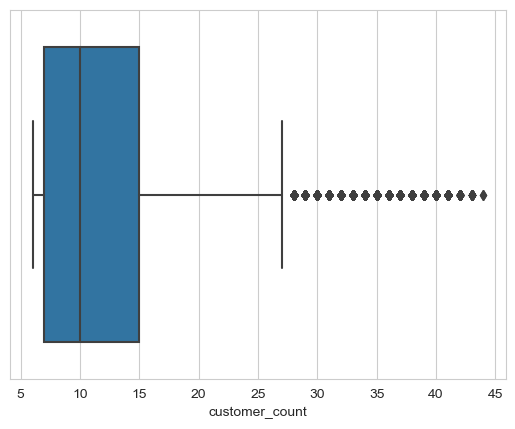

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


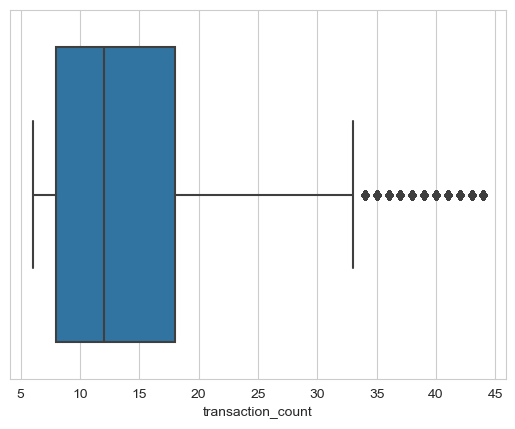

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


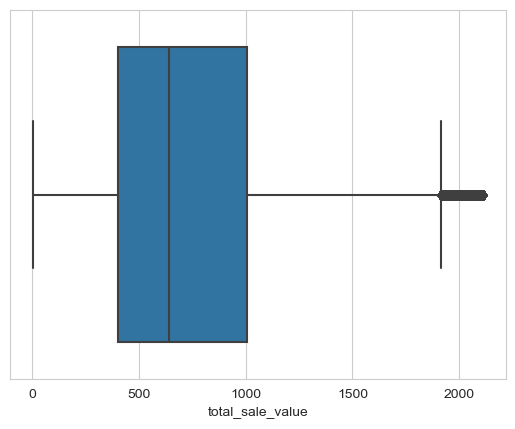

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


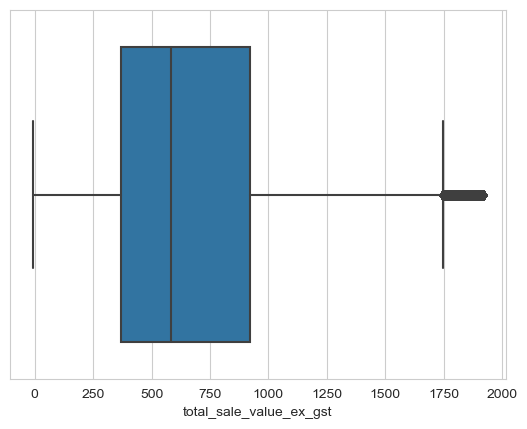

C:\Users\12442\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


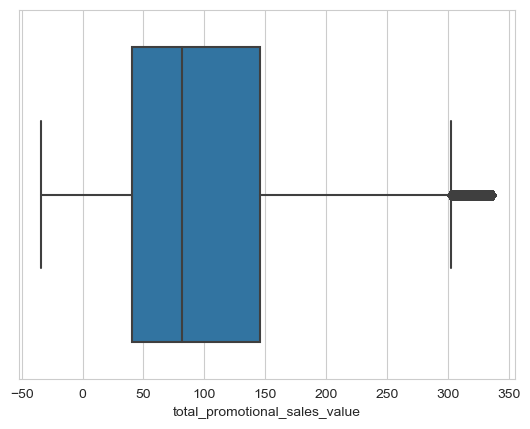

In [9]:
# Mapping outliers in boxplots

for i in df:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.show()

In [10]:
# Check and remove duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


## 1.2  Sales by store location

In [11]:
# Loading another dataset
data= pd.read_csv('Sales by store location.csv') 

In [12]:
# Find out the missing values
data =data .replace(r'^\s*$',np.nan, regex=True)
data.isnull().sum()

store_id                          0
store_state                       0
store_postcode                    0
store_latitude                    0
store_longitude                   0
co_location_flag                 11
sales_channel                     0
distance_to_kmart                 1
distance_to_target                1
total_sale_value                  0
total_sale_value_ex_gst           0
total_promotional_sales_value     0
dtype: int64

In [13]:
# Fill missing values in price_lifestage_segment with the mode
mode_value = data['distance_to_kmart'].mode()[0]
data['distance_to_kmart'].fillna(mode_value, inplace=True)

In [14]:
# Fill missing values in price_lifestage_segment with the mode
mode_value = data['distance_to_target'].mode()[0]
data['distance_to_target'].fillna(mode_value, inplace=True)

In [15]:
# Fill missing values in price_lifestage_segment with the mode
mode_value = data['co_location_flag'].mode()[0]
data['co_location_flag'].fillna(mode_value, inplace=True)

data.dropna
data

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,sales_channel,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,True,Digital - Delivery,Same Centre,>5 KM,19893406.80,18089405.66,233280.34
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Store,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Digital - ClickCollect,>5 KM,<1 KM,3950499.23,3593377.70,36306.13
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Store,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Digital - ClickCollect,>5 KM,<1 KM,3910046.42,3556971.06,36379.29
...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Store,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Digital - ClickCollect,Same Centre,Same Centre,3475983.65,3161995.57,27192.66
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Store,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Digital - ClickCollect,Same Centre,Same Centre,2433211.16,2213407.30,17508.98


In [16]:
# Check out the missing values after filling
data =data .replace(r'^\s*$',np.nan, regex=True)
data.isnull().sum()

store_id                         0
store_state                      0
store_postcode                   0
store_latitude                   0
store_longitude                  0
co_location_flag                 0
sales_channel                    0
distance_to_kmart                0
distance_to_target               0
total_sale_value                 0
total_sale_value_ex_gst          0
total_promotional_sales_value    0
dtype: int64

In [17]:
# Check and remove duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


## 1.3 Media Investment

In [18]:
# Read the third dataset
media_df= pd.read_csv('Media Investment.csv') 

media_df

,week_ending,state,media_amount_spend
0,11/07/2021,NT,5.960267e+03
1,9/10/2022,NT,1.172715e+04
2,22/01/2023,NT,1.391871e+04
3,2/01/2022,NT,1.307618e+04
4,5/06/2022,NT,2.014875e+04
...,...,...,...
943,1/01/2023,National,9.323000e+06
944,4/07/2021,National,4.810000e+06
945,3/10/2021,National,9.185000e+06
946,5/12/2021,National,6.429000e+06


In [19]:
# Find out the missing values
media_df =media_df .replace(r'^\s*$',np.nan, regex=True)
media_df.isnull().sum()

week_ending           0
state                 0
media_amount_spend    0
dtype: int64

# 2. Feature engineering

##  2.1 Customer segmentation

In [20]:
# Split the 'price_lifestage_segment' column and create two new columns
df[['price_segment', 'lifestage']] = df['price_lifestage_segment'].str.split('-', 1, expand=True)

# Drop the original 'price_lifestage_segment' column
df.drop(columns=['price_lifestage_segment'], inplace=True)

# Display the DataFrame with the new columns
df


TypeError: split() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
# View the unique variable values in the 'lifestage' column
unique_lifestages = df['lifestage'].unique()

print(unique_lifestages)


In [ ]:
# Calculate the count of each unique value in the 'lifestage' column
lifestage_counts = df['lifestage'].value_counts()

# Print the counts
print(lifestage_counts)


## 2.2 Customer postcode formatting

In [ ]:
# Convert 'customer_postcode' to integer data type
df['customer_postcode'] = df['customer_postcode'].astype(int)

# Display the DataFrame with the updated 'customer_postcode' variable
df

## 2.3 Sales channel transformation

In [ ]:
data.head(10)

In [ ]:
data.columns

In [21]:
# Rename the columns to make them more interpretable
data.rename(columns={
    'Digital - ClickCollect': 'digital_click_collect',
    'Digital - Delivery': 'digital_delivery',
    'Store': 'store'
}, inplace=True)

data

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,sales_channel,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,True,Digital - Delivery,Same Centre,>5 KM,19893406.80,18089405.66,233280.34
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Store,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Digital - ClickCollect,>5 KM,<1 KM,3950499.23,3593377.70,36306.13
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Store,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Digital - ClickCollect,>5 KM,<1 KM,3910046.42,3556971.06,36379.29
...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Store,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Digital - ClickCollect,Same Centre,Same Centre,3475983.65,3161995.57,27192.66
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Store,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Digital - ClickCollect,Same Centre,Same Centre,2433211.16,2213407.30,17508.98


In [22]:
import pandas as pd

# Use one-hot encoding to convert the 'sales_channel' column
data = pd.get_dummies(data, columns=['sales_channel'], prefix='sales_channel')

# Now, the 'sales_channel' column has been split into three columns with 0s and 1s
# 'sales_channel_Digital - Delivery', 'sales_channel_Digital - ClickCollect', 'sales_channel_Store'

# Optionally, you can rename the columns for clarity
data.rename(columns={
    'sales_channel_Digital - Delivery': 'digital_delivery',
    'sales_channel_Digital - ClickCollect': 'digital_click_collect',
    'sales_channel_Store': 'store'
}, inplace=True)

data


,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,digital_click_collect,digital_delivery,store
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,True,Same Centre,>5 KM,19893406.80,18089405.66,233280.34,False,True,False
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92,False,False,True
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,3950499.23,3593377.70,36306.13,True,False,False
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29,False,False,True
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,3910046.42,3556971.06,36379.29,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85,False,False,True
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,3475983.65,3161995.57,27192.66,True,False,False
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90,False,False,True
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Same Centre,Same Centre,2433211.16,2213407.30,17508.98,True,False,False


In [23]:
count_of_digital_click_collect = data['digital_click_collect'].sum()
print("Count of digital_click_collect:", count_of_digital_click_collect)

Count of digital_click_collect: 177


In [24]:
count_of_store = data['store'].sum()
print("Count of store:", count_of_store)

Count of store: 177


In [25]:
count_of_digital_delivery = data['digital_delivery'].sum()
print("Count of digital_delivery:", count_of_digital_delivery)

Count of digital_delivery: 71


## 2.4 Distance transformation

In [26]:
unique_distances = data['distance_to_kmart'].unique()
print(unique_distances)

['Same Centre' '>5 KM' '<1 KM' '3-5 KM' '1-3 KM']


In [27]:
distance_mapping = {
    'Same Centre': 0,
    '<1 KM': 1,
    '1-3 KM': 2,
    '3-5 KM': 3,
    '>5 KM': 4
}
data['distance_to_kmart_encoded'] = data['distance_to_kmart'].map(distance_mapping)
data

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,digital_click_collect,digital_delivery,store,distance_to_kmart_encoded
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,True,Same Centre,>5 KM,19893406.80,18089405.66,233280.34,False,True,False,0
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92,False,False,True,4
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,3950499.23,3593377.70,36306.13,True,False,False,4
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29,False,False,True,4
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,3910046.42,3556971.06,36379.29,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85,False,False,True,0
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,3475983.65,3161995.57,27192.66,True,False,False,0
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90,False,False,True,0
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Same Centre,Same Centre,2433211.16,2213407.30,17508.98,True,False,False,0


In [28]:
unique_distances = data['distance_to_target'].unique()
print(unique_distances)

['>5 KM' '<1 KM' '1-3 KM' '3-5 KM' 'Same Centre']


In [29]:
distance_mapping = {
    'Same Centre': 0,
    '<1 KM': 1,
    '1-3 KM': 2,
    '3-5 KM': 3,
    '>5 KM': 4
}
data['distance_to_target_encoded'] = data['distance_to_target'].map(distance_mapping)
data

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,digital_click_collect,digital_delivery,store,distance_to_kmart_encoded,distance_to_target_encoded
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,True,Same Centre,>5 KM,19893406.80,18089405.66,233280.34,False,True,False,0,4
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92,False,False,True,4,1
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,>5 KM,<1 KM,3950499.23,3593377.70,36306.13,True,False,False,4,1
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29,False,False,True,4,1
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,>5 KM,<1 KM,3910046.42,3556971.06,36379.29,True,False,False,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85,False,False,True,0,0
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,3475983.65,3161995.57,27192.66,True,False,False,0,0
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90,False,False,True,0,0
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Same Centre,Same Centre,2433211.16,2213407.30,17508.98,True,False,False,0,0


## 2.5 location （state and co flag）

In [30]:
# Create dummy variables for the 'co_location_flag' column
data = pd.get_dummies(data, columns=['co_location_flag'], prefix='co_location_flag', drop_first=True)
data

,store_id,store_state,store_postcode,store_latitude,store_longitude,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,digital_click_collect,digital_delivery,store,distance_to_kmart_encoded,distance_to_target_encoded,co_location_flag_True
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,Same Centre,>5 KM,19893406.80,18089405.66,233280.34,False,True,False,0,4,True
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92,False,False,True,4,1,False
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,>5 KM,<1 KM,3950499.23,3593377.70,36306.13,True,False,False,4,1,False
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29,False,False,True,4,1,True
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,>5 KM,<1 KM,3910046.42,3556971.06,36379.29,True,False,False,4,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85,False,False,True,0,0,True
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Same Centre,Same Centre,3475983.65,3161995.57,27192.66,True,False,False,0,0,True
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90,False,False,True,0,0,True
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,Same Centre,Same Centre,2433211.16,2213407.30,17508.98,True,False,False,0,0,True


In [31]:
# Use get_dummies to one-hot encode the 'store_state' column
data_encoded = pd.get_dummies(data, columns=['store_state'], prefix=['store_state'])

data

,store_id,store_state,store_postcode,store_latitude,store_longitude,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,digital_click_collect,digital_delivery,store,distance_to_kmart_encoded,distance_to_target_encoded,co_location_flag_True
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,Same Centre,>5 KM,19893406.80,18089405.66,233280.34,False,True,False,0,4,True
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92,False,False,True,4,1,False
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,>5 KM,<1 KM,3950499.23,3593377.70,36306.13,True,False,False,4,1,False
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29,False,False,True,4,1,True
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,>5 KM,<1 KM,3910046.42,3556971.06,36379.29,True,False,False,4,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85,False,False,True,0,0,True
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Same Centre,Same Centre,3475983.65,3161995.57,27192.66,True,False,False,0,0,True
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90,False,False,True,0,0,True
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,Same Centre,Same Centre,2433211.16,2213407.30,17508.98,True,False,False,0,0,True


# 3. Exploratory Data Analysis 

## 3.1 Comparison of e-commerce and offline store sales

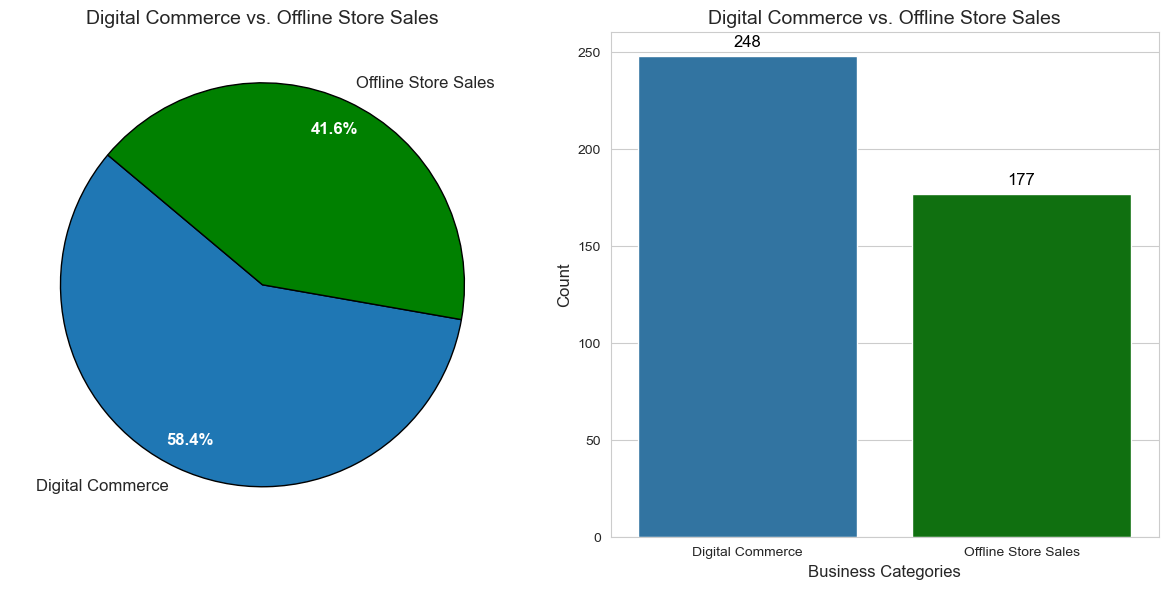

In [32]:
# Define the data
counts_total = [count_of_digital_click_collect + count_of_digital_delivery, count_of_store]  # Total counts for Digital Commerce and Store

# Create subplots for the first group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Color palette for bar chart
colors_bar = ['#1f77b4', '#008000']  # Blue and green

# Pie Chart: Comparison of Digital Commerce vs. Offline Store Sales
pie_colors = ['#1f77b4', '#008000']  
_, texts, autotexts = axes[0].pie(counts_total, labels=['Digital Commerce', 'Offline Store Sales'],
                                   autopct='%1.1f%%', startangle=140, pctdistance=0.85,
                                   colors=pie_colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Digital Commerce vs. Offline Store Sales', fontsize=14)
# Add data labels to the pie chart
for text, autotext in zip(texts, autotexts):
    autotext.set(size=12, weight='bold', color='white')
    text.set(size=12)

# Bar Chart: Comparison of Digital Commerce vs. Offline Store Sales
sns.set_palette(colors_bar)
bar1 = sns.barplot(x=['Digital Commerce', 'Offline Store Sales'], y=counts_total, ax=axes[1])
axes[1].set_title('Digital Commerce vs. Offline Store Sales', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Business Categories', fontsize=12) 
# Add data labels to the bar chart
for p in bar1.patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')


plt.tight_layout()
plt.show()


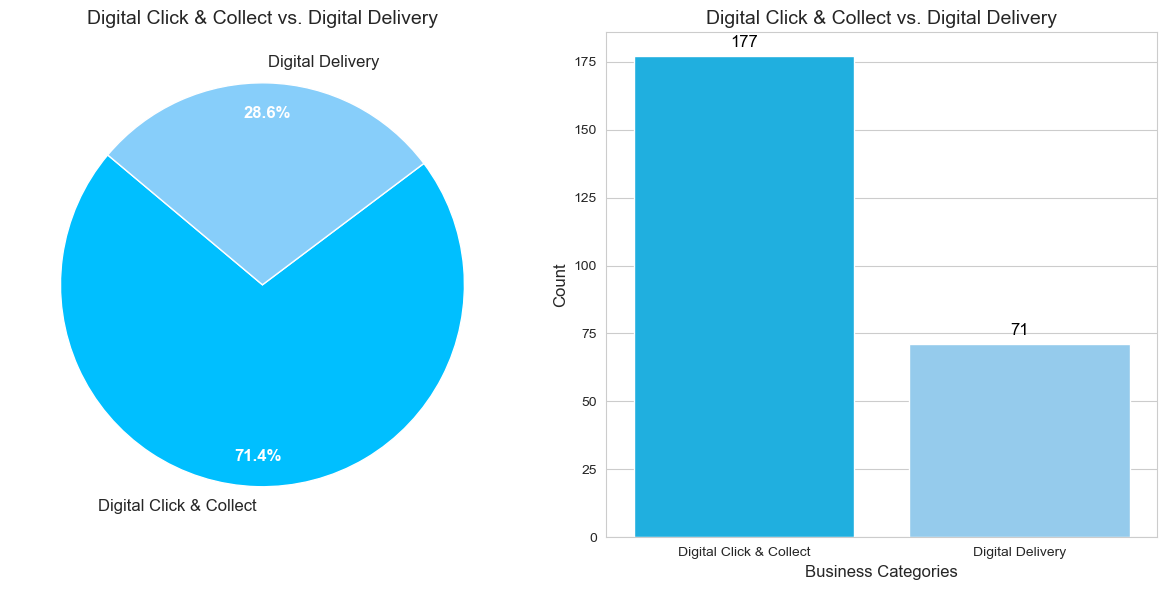

In [33]:
# Define the data
counts_digital_commerce = [count_of_digital_click_collect, count_of_digital_delivery]

# Create subplots for the second group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Specify colors for both plots (light blue and sky blue)
colors = ['#00BFFF', '#87CEFA']

# Pie Chart: Comparison of Digital Click & Collect vs. Digital Delivery
_, texts, autotexts = axes[0].pie(counts_digital_commerce, labels=['Digital Click & Collect', 'Digital Delivery'],
                                   autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
axes[0].set_title('Digital Click & Collect vs. Digital Delivery', fontsize=14)
# Add data labels to the pie chart
for text, autotext in zip(texts, autotexts):
    autotext.set(size=12, weight='bold', color='white')
    text.set(size=12)

# Bar Chart: Comparison of Digital Click & Collect vs. Digital Delivery
bar_colors = ['#00BFFF', '#87CEFA']
bar2 = sns.barplot(x=['Digital Click & Collect', 'Digital Delivery'], y=counts_digital_commerce, ax=axes[1], palette=bar_colors)
axes[1].set_title('Digital Click & Collect vs. Digital Delivery', fontsize=14)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Business Categories', fontsize=12)  # Adding x-axis label
# Add data labels to the bar chart
for p in bar2.patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                    va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Customize layout
plt.tight_layout()

# Show the second group of charts
plt.show()


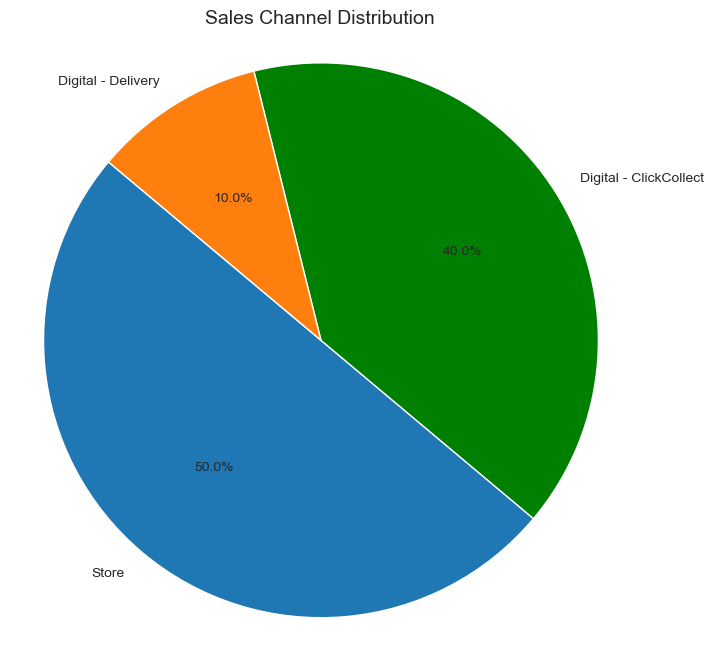

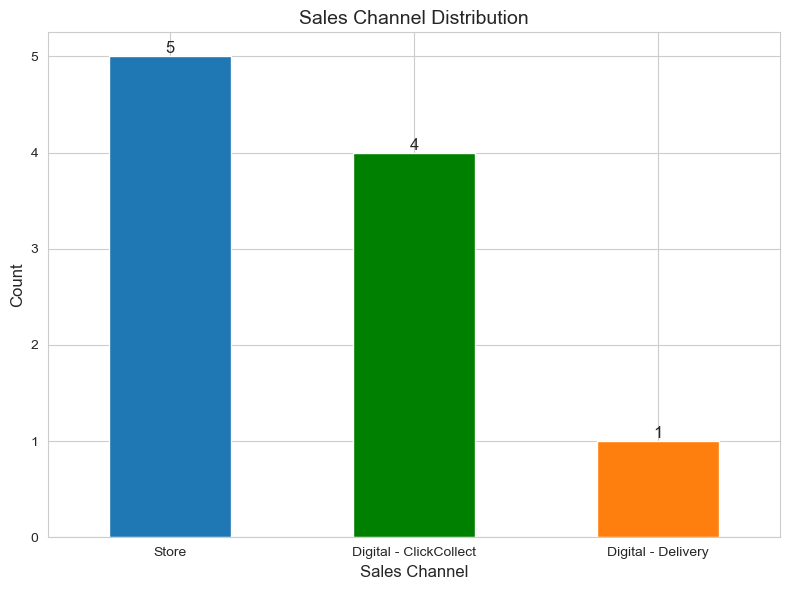

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建数据集
data_total = {
    'sales_channel': ['Digital - Delivery', 'Store', 'Digital - ClickCollect', 'Store', 'Digital - ClickCollect',
                      'Store', 'Digital - ClickCollect', 'Store', 'Digital - ClickCollect', 'Store']
}

# 创建DataFrame
df_total = pd.DataFrame(data_total)

# 计算不同'sales_channel'项的数量
sales_channel_counts = df_total['sales_channel'].value_counts()

# 创建饼图
colors = [ '#1f77b4','#008000','#ff7f0e'] 
plt.figure(figsize=(8, 8))
plt.pie(sales_channel_counts, labels=sales_channel_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sales Channel Distribution', fontsize=14)
plt.axis('equal')

# 创建柱状图 
plt.figure(figsize=(8, 6))
sales_channel_counts.plot(kind='bar', color=['#1f77b4', '#008000', '#ff7f0e'])
plt.title('Sales Channel Distribution', fontsize=14)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# 添加柱形顶端数据标签
for index, value in enumerate(sales_channel_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


## 3.2 Location review

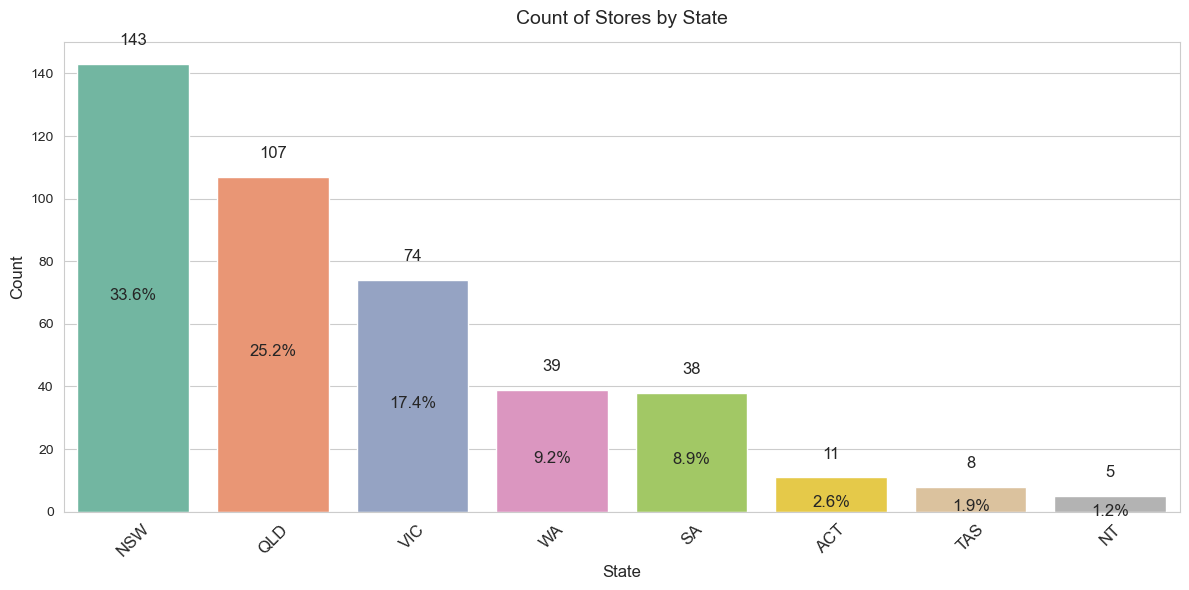

In [35]:
# Count the occurrences of each store_state
state_counts = data['store_state'].value_counts()

# Calculate percentages
total_stores = len(data)
percentages = [(count / total_stores) * 100 for count in state_counts.values]

# Create a Seaborn bar plot with a nice color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, palette='Set2')

# Add data and percentage labels manually, with adjusted vertical alignment
for i, (count, percentage) in enumerate(zip(state_counts.values, percentages)):
    ax.text(i, count + 5, f'{int(count):,d}', ha='center', va='bottom', fontsize=12)
    ax.text(i, count / 2, f'{percentage:.1f}%', ha='center', va='top', fontsize=12)

# Set title and labels with adjusted positions
plt.title('Count of Stores by State', fontsize=14, y=1.02)  # Adjust the 'y' value to move the title higher
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for readability

plt.tight_layout()  # Ensure tight layout to prevent clipping of labels

plt.show()


In [36]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
import folium
from branca.colormap import linear
from folium import plugins

# Create a map centered on Australia
m = folium.Map(location=[-25.0, 133.0], zoom_start=4)

# Define a colormap for total_sale_value
min_value = min(data['total_sale_value'])
max_value = max(data['total_sale_value'])
colormap = linear.YlGnBu_09.scale(min_value, max_value)

# Add markers for each store with varying colors based on total_sale_value
for index, row in data.iterrows():  # Change df to data here
    folium.CircleMarker(
        location=[row['store_latitude'], row['store_longitude']],
        radius=8,
        color=colormap(row['total_sale_value']),
        fill=True,
        fill_color=colormap(row['total_sale_value']),
        fill_opacity=0.7,
        tooltip=f"Store ID: {row['store_id']}<br>Total Sale Value: {row['total_sale_value']}",
    ).add_to(m)

# Add a custom legend with labeled color categories
legend_categories = ['Low', 'Medium', 'High']
legend_colors = [colormap(min_value + (max_value - min_value) * i / (len(legend_categories) - 1)) for i in range(len(legend_categories))]
legend_labels = dict(zip(legend_categories, legend_colors))
legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index:1000; background-color: white; padding: 10px; border: 2px solid gray; border-radius: 5px;">
        <div style="width:20px; height:20px; background-color: {}">&nbsp;</div> {}<br>
        <div style="width:20px; height:20px; background-color: {}">&nbsp;</div> {}<br>
        <div style="width:20px; height:20px; background-color: {}">&nbsp;</div> {}<br>
    </div>
""".format(
    legend_colors[0], legend_categories[0],
    legend_colors[1], legend_categories[1],
    legend_colors[2], legend_categories[2]
)

m.get_root().html.add_child(folium.Element(legend_html))


m


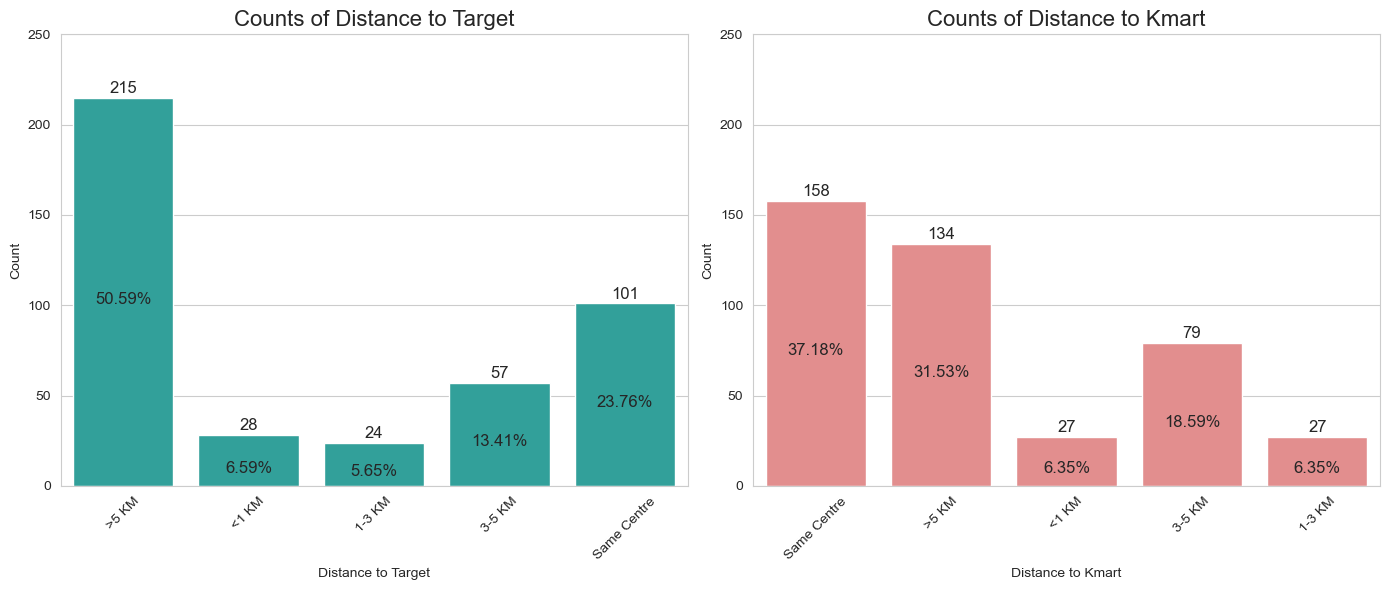

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the unique values in 'distance_to_target' and 'distance_to_kmart' columns
distance_to_target_counts = data['distance_to_target'].value_counts()
distance_to_kmart_counts = data['distance_to_kmart'].value_counts()

# Get the unique values in 'distance_to_target' and 'distance_to_kmart' columns to maintain the order
unique_distance_to_target = data['distance_to_target'].unique()
unique_distance_to_kmart = data['distance_to_kmart'].unique()

# Calculate percentages
distance_to_target_percentages = (distance_to_target_counts / distance_to_target_counts.sum()) * 100
distance_to_kmart_percentages = (distance_to_kmart_counts / distance_to_kmart_counts.sum()) * 100

# Create subplots for bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for 'distance_to_target' with light purple color
sns.barplot(x=unique_distance_to_target, y=distance_to_target_counts[unique_distance_to_target], ax=axes[0], color='lightseagreen')
axes[0].set_xticklabels(unique_distance_to_target, rotation=45)
axes[0].set_xlabel('Distance to Target')
axes[0].set_ylabel('Count')
axes[0].set_title('Counts of Distance to Target', fontsize=16)
axes[0].set_ylim([0, 250])  # Set y-axis limits

# Add count and percentage labels for 'distance_to_target'
for i, count in enumerate(distance_to_target_counts[unique_distance_to_target]):
    axes[0].text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=12)
    axes[0].text(i, count / 2, f'{distance_to_target_percentages[unique_distance_to_target][i]:.2f}%', ha='center', va='top', fontsize=12)

# Bar chart for 'distance_to_kmart' with pink color
sns.barplot(x=unique_distance_to_kmart, y=distance_to_kmart_counts[unique_distance_to_kmart], ax=axes[1], color='lightcoral')
axes[1].set_xticklabels(unique_distance_to_kmart, rotation=45)
axes[1].set_xlabel('Distance to Kmart')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts of Distance to Kmart', fontsize=16)
axes[1].set_ylim([0, 250])  # Set y-axis limits

# Add count and percentage labels for 'distance_to_kmart'
for i, count in enumerate(distance_to_kmart_counts[unique_distance_to_kmart]):
    axes[1].text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=12)
    axes[1].text(i, count / 2, f'{distance_to_kmart_percentages[unique_distance_to_kmart][i]:.2f}%', ha='center', va='top', fontsize=12)

plt.tight_layout()
plt.show()


## 3.3 Time series analysis

In [1]:
# Convert 'financial_week_end_date' to datetime with the correct format
df['financial_week_end_date'] = pd.to_datetime(df['financial_week_end_date'], format='%Y-%m-%d', errors='coerce')

# Filter out rows with NaT values (invalid dates)
df = df.dropna(subset=['financial_week_end_date'])

# Create a new DataFrame containing monthly sales data and monthly media spend data
df['month'] = df['financial_week_end_date'].dt.to_period('M')
monthly_sales_df = df.groupby(['customer_state', 'month'])['total_sale_value'].sum().reset_index()

# Ensure that 'week_ending' in media_df is in datetime format
media_df['week_ending'] = pd.to_datetime(media_df['week_ending'], format='%d/%m/%Y')  # Update the format if needed

monthly_media_spend_df = media_df.groupby(['state', media_df['week_ending'].dt.to_period('M')])['media_amount_spend'].sum().reset_index()
monthly_media_spend_df.rename(columns={'week_ending': 'month'}, inplace=True)

# Convert time periods to datetime objects
monthly_media_spend_df['month'] = monthly_media_spend_df['month'].dt.to_timestamp()

# Convert 'month' column to datetime in monthly_sales_df and different states
monthly_sales_df['month'] = monthly_sales_df['month'].dt.to_timestamp()
states = monthly_sales_df['customer_state'].unique()

# Plotting
fig, axes = plt.subplots(len(states), 1, figsize=(12, 6 * len(states)), sharex=True)

max_y_value = 0  # 用于存储最大刻度值

for i, state in enumerate(states):
    state_data_sales = monthly_sales_df[monthly_sales_df['customer_state'] == state]
    state_data_media_spend = monthly_media_spend_df[monthly_media_spend_df['state'] == state]
    
    axes[i].plot(state_data_sales['month'], state_data_sales['total_sale_value'], label=f'Sales - {state}', marker='o')
    axes[i].plot(state_data_media_spend['month'], state_data_media_spend['media_amount_spend'], label=f'Media Spend - {state}', marker='o')

    axes[i].set_ylabel('Amount')
    axes[i].set_title(f'Monthly Sales vs. Media Spend - {state}')
    axes[i].legend()
    axes[i].grid(True)

    # Set tick labels to show only March, June, September, and December (quarterly analysis report)
    x_ticks = state_data_sales['month'][state_data_sales['month'].dt.month.isin([3, 6, 9, 12])]
    x_ticks = x_ticks.append(pd.Series(pd.to_datetime(['2021-06-01'])))  # Adding Jun 2021 tick as a Series
    x_labels = x_ticks.dt.strftime('%Y-%m-%b')
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels([])  # Clear x-axis tick labels
    
    # Add annotations below subplots to display months and years
    for tick in x_ticks:
        axes[i].annotate(tick.strftime('%b %Y'), (tick, 0), textcoords="offset points", xytext=(0,-20), ha='center')
        
    # 更新最大刻度值
    max_y_value = max(max_y_value, state_data_sales['total_sale_value'].max(), state_data_media_spend['media_amount_spend'].max())

# 设置所有子图的y轴刻度范围为最大刻度值
for i in range(len(states)):
    axes[i].set_ylim([0, max_y_value])

plt.subplots_adjust(hspace=0.4)

plt.show()


NameError: name 'pd' is not defined

## 3.4 Targeted customer

In [ ]:
# Create a DataFrame containing counts for each Price Segment
price_segment_counts = df['price_segment'].value_counts()

# Create a DataFrame containing counts for each Lifestage
lifestage_counts = df['lifestage'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Price Segment distribution
sns.barplot(x=price_segment_counts.index, y=price_segment_counts.values, ax=axes[0], palette="Blues_d")
axes[0].set_xlabel('Price Segment')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add percentages and numbers
total_price_segment = price_segment_counts.sum()

for i in range(len(price_segment_counts)):
    count = price_segment_counts[i]
    percentage = count / total_price_segment * 100
    axes[0].annotate(f'{count}\n{percentage:.2f}%', (i, count), ha='center', va='bottom', fontsize=10, color='black')

# Set the title
axes[0].set_title('Price Segment Distribution', fontsize=14, pad=20)
axes[0].title.set_position([0.5, 1.03])  # Adjust title position

# Plot Lifestage distribution
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, ax=axes[1], palette="Oranges_d")
axes[1].set_xlabel('Lifestage')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add percentages and numbers
total_lifestage = lifestage_counts.sum()

for i in range(len(lifestage_counts)):
    count = lifestage_counts[i]
    percentage = count / total_lifestage * 100
    axes[1].annotate(f'{count}\n{percentage:.2f}%', (i, count), ha='center', va='bottom', fontsize=10, color='black')

# Set the title
axes[1].set_title('Lifestage Distribution', fontsize=14, pad=20)
axes[1].title.set_position([0.5, 1.03])  # Adjust title position

plt.tight_layout()
plt.show()


## 3.5 Numerical correlation explore

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['total_sale_value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Sale Value', fontsize=16)
plt.xlabel('Total Sale Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Select the numerical columns you want to include in the correlation matrix
numerical_columns = [
    'customer_count',
    'transaction_count',
    'total_sale_value',
    'total_sale_value_ex_gst',
    'total_promotional_sales_value',
]

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
numerical_features = [
    'store_postcode',
    'store_latitude',
    'store_longitude',
    'total_sale_value',
    'distance_to_kmart_encoded',
    'distance_to_target_encoded',
    'total_sale_value_ex_gst',
    'total_promotional_sales_value',
    'digital_click_collect',
    'digital_delivery',
    'store',
    'co_location_flag_True'
]

correlation_matrix = data[numerical_features].corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 3.6 Marketing promotion

In [ ]:
data

In [ ]:
# Log transformation
data['log_total_sale_value'] = np.log(data['total_sale_value'])
data['log_total_promotional_sales_value'] = np.log(data['total_promotional_sales_value'])

log_total_sale_value = data['log_total_sale_value']
log_total_promotional_sales_value = data['log_total_promotional_sales_value']

# Scatter plotting with a gray regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=log_total_promotional_sales_value, y=log_total_sale_value, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot of Log Transformed Total Promotional Sales Value vs Log Transformed Total Sale Value', fontsize=16)
plt.xlabel('Log Total Promotional Sales Value')
plt.ylabel('Log Total Sale Value')
plt.grid(True)
plt.show()


## 3.7 GST effect

In [ ]:
total_sale_value = data['total_sale_value']
total_sale_value_ex_gst = data['total_sale_value_ex_gst']

# Scatter plotting
plt.figure(figsize=(10, 6))
plt.scatter(total_sale_value, total_sale_value_ex_gst, alpha=0.5, label='Data Points')  # alpha 设置点的透明度

# Trend line
z = np.polyfit(total_sale_value, total_sale_value_ex_gst, 1)
p = np.poly1d(z)
plt.plot(total_sale_value, p(total_sale_value), color='red', label='Trendline')

plt.title('Scatter Plot of Total Sale Value vs Total Sale Value Excluding GST', fontsize=16)
plt.xlabel('Total Sale Value')
plt.ylabel('Total Sale Value Excluding GST')
plt.grid(True)

# Labels
plt.legend()
plt.show()


## 3.8 Offline store VS E-commerce

## 3.9 Initial regression analysis

In [ ]:
import statsmodels.api as sm

# Regarding the sales by customer location
X = df[['customer_count', 'transaction_count', 'total_sale_value_ex_gst', 'total_promotional_sales_value']]
y = df['total_sale_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


print(model.summary())
